# ARMA and ARIMA (manually)

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso

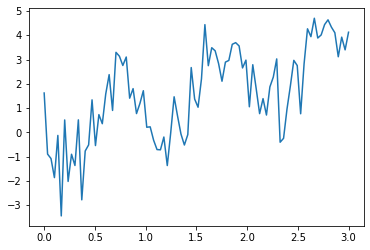

In [102]:
# Generate signal
# Generate signal
cycles = 3
x = np.linspace(0, cycles, cycles*30)
np.random.seed(1)
y = x - np.sin(x*np.pi*2)*1.5 + np.random.normal(size=x.shape)

plt.plot(x,y);

# Let's start with a naive non-stationary autoregression

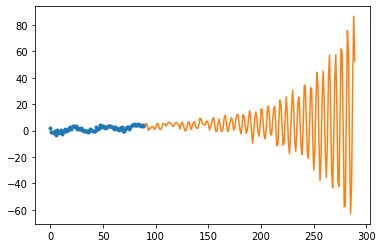

In [114]:
p = 40
x = np.zeros((y.shape[0]-p, p))
for i in range(p):
    x[:,i] = y[i:(-p+i)]

# Now fit a model:
model = LinearRegression().fit(x,y[p:])
#model = Lasso(alpha=0.01).fit(x,y[p:])

n = 200
base = y[-p:]
trace = np.zeros(n)
for i in range(n):
    val = model.predict(base[np.newaxis, :])
    base = np.concatenate((base[1:], val))
    trace[i] = val
    
plt.plot(y, '.')
plt.plot(y.shape[0] +  np.arange(trace.shape[0]), trace);